<a href="https://colab.research.google.com/github/RachanaYajur/PhotoNeutron_source_testing/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Least Squares Fitting

a) Generate many (~1000)“experiments”of 15 data points each where the data follows a straight line with some known Gaussian resolution function on the measurement of y, and a known value of x.  Pick reasonable values for m and b (the two parameters of your model for the line), and sigma (the Gaussian resolution of your experiment).(I picked 2, 6, and 2 respectively).  Show a plot of one of your experiments, with the error bars being +/-one-sigma errors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

def experiment():
  m = 2.
  b = 6.
  sigma = 2.
  N = 15
  #choosing random x to lie in in the range [0,10]
  listt = np.arange(0,15,1)
  #print(listt)
  #x = np.array(random.sample(listt,N))
  #print(x)
  x = listt
  mu = m*x + b
  data = []
  for i in range(N):
    data.append(np.random.normal(mu[i], sigma, 1)[0])
  #print(data)
  return(x,data) 

Nexp = 1000
datas = []
xs = []
for i in range(Nexp):
  x,d = experiment()
  xs.append(x)
  datas.append(d)

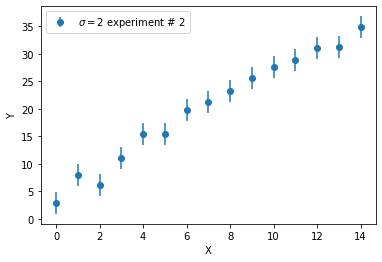

In [2]:
import itertools

new_x, new_y = zip(*sorted(zip(xs[1], datas[1])))
fig = plt.figure()
plt.errorbar(new_x,new_y,yerr=2.,label=r'$\sigma = 2.$ experiment # 2',marker='o',linestyle='none')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

b) Fit the data for each experiment using a linear least squares fit (LLS)and show that over many experiments, the estimators for the slope and intercept are unbiased

In [3]:
from scipy.optimize import curve_fit

def func(x,m,b):
  return(m*x + b)

x0 = np.array([0.0,0.0])
sig = 2.*np.ones(15)

ms = []
bs = []

for i in range(Nexp):  
  popt, pcov = curve_fit(func, xs[i], datas[i],x0,sig)
  ms.append(popt[0])
  bs.append(popt[1])



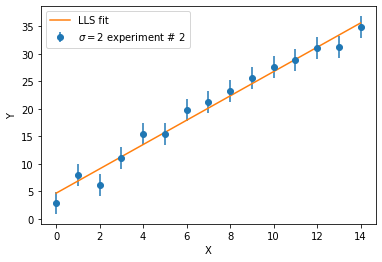

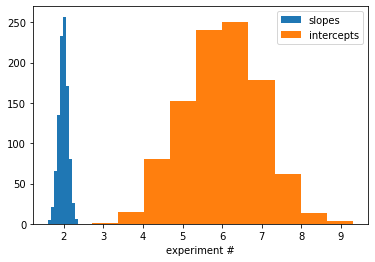

In [4]:
plt.errorbar(new_x,new_y,yerr=2.,label=r'$\sigma = 2.$ experiment # 2',marker='o',linestyle='none')
fy =[]
for i in range(15):
  fy.append(func(new_x[i],ms[1],bs[1]))
plt.plot(new_x,fy,label='LLS fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
plt.hist(ms,label='slopes')
plt.hist(bs,label='intercepts')
plt.xlabel('experiment #')
plt.legend()
plt.show()

Since the distribution of the slopes and the intercepts seem to follow a Gaussian distribution, the estimation of the parameters can be concluded to be unbiased. 


---



c) What is the expected distribution that the Chi2 values should follow(the functional form)?What is the value of the single parameter in this fit for the distribution of Chi2, and how does it relate to the number of data points per experiment you started with?Show that theChi2values follow the expected distribution.  Plot the reduced Chi2 and compare it to the expectation

$\chi^2(\vec{\theta}) = \Sigma_{i=1}^N \dfrac{(y_i-\lambda_i(x_i;\vec{\theta}))^2}{\sigma_i^2}$

In this case, $\vec{\theta} = (m,b)$

$\chi^2(m,b) = \Sigma_{i=1}^N \dfrac{(y_i- (mx_i+b))^2}{\sigma_i^2}$

Given that $y_i$ was selected from a gaussian with a mean of $m x_i + b$, The distribution of the $\chi^2$ function must be a poissonian


In [5]:
 def chi2(data,fit,sigma):
   return((1/sigma**2)*sum((data-fit)**2))


fit_ys = []
for i in range(Nexp):
  ys = np.dot(ms[i].T,xs[i]) + bs[i]
  fit_ys.append(ys)

chi2s = []
for i in range(Nexp):
  chi2s.append(chi2(np.array(datas[i]),np.array(fit_ys[i]),2))

In [6]:
chi2s[1]

7.424201158875747

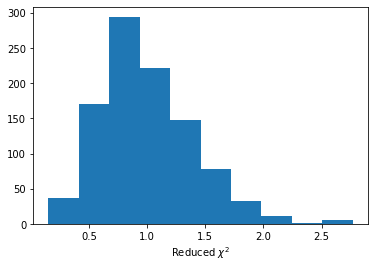

In [7]:
degreeOfFreedom = 15. - 2.
reducedChi2 = np.array(chi2s)/degreeOfFreedom
plt.hist(reducedChi2)
plt.xlabel(r'Reduced $\chi^2$')
plt.show()

d) Now add a quadratic term to the fit.  How do the Chi2values for the fit change? For how many of your experiments do you prefer a quadratic fit to a linear fit (i.e is Chi2 per degree of freedom better)?

In [8]:
def quadf(x,m,b,c):
  return(m*x**2 + b*x +c)


ms2 = []
bs2 = []
cs2 = []


for i in range(Nexp):  
  popt2, pcov2 = curve_fit(quadf, xs[i], datas[i],sigma=sig)
  ms2.append(popt2[0])
  bs2.append(popt2[1])
  cs2.append(popt2[2])


In [9]:
fit_ys_q = []
for i in range(Nexp):
  ys = np.dot(ms2[i].T,xs[i]**2) + np.dot(bs2[i].T,xs[i]) + cs2[i]
  fit_ys_q.append(ys)

chi2s_q = []
for i in range(Nexp):
  chi2s_q.append(chi2(np.array(datas[i]),np.array(fit_ys_q[i]),2))

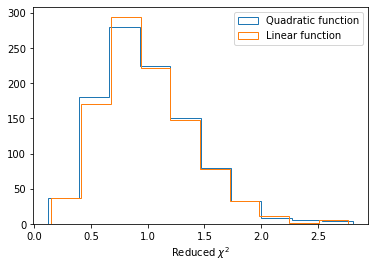

In [10]:
degreeOfFreedom_q = 15. - 3.
reducedChi2_q = np.array(chi2s_q)/degreeOfFreedom_q
plt.hist(reducedChi2_q,histtype='step',label='Quadratic function')
plt.hist(reducedChi2,histtype='step',label='Linear function')
plt.xlabel(r'Reduced $\chi^2$ ')
plt.legend()
plt.show()

From the above histogram we can notice that the reduced $\chi^2 < 1$ is larger in case when there is a quadratic term. This implies that curve is 'overfitted' when a quadratic term is added to the fitting.

e) Repeat, generating experiments where the data follows a quadratic functional and explore the differences in going from a linear to a quadratic fit to the data.

In [11]:
def experiment_q():
  m = 2.
  b = 6.
  c = 2
  sigma = 2.
  N = 15
  #choosing random x to lie in in the range [0,10]
  listt = np.arange(0,15,1)
  #print(listt)
  #x = np.array(random.sample(listt,N))
  #print(x)
  x = listt
  mu = m*x**2 + b*x + c
  data = []
  for i in range(N):
    data.append(np.random.normal(mu[i], sigma, 1)[0])
  #print(data)
  return(x,data) 

Nexp = 1000
qdatas = []
qxs = []
for i in range(Nexp):
  x,d = experiment_q()
  qxs.append(x)
  qdatas.append(d)



In [12]:

sig = 2.*np.ones(15)

lqms = []
lqbs = []

for i in range(Nexp):  
  popt, pcov = curve_fit(func, qxs[i], qdatas[i],sigma=sig)
  lqms.append(popt[0])
  lqbs.append(popt[1])

lqfit_ys = []
for i in range(Nexp):
  ys = np.dot(lqms[i].T,qxs[i]) + lqbs[i]
  lqfit_ys.append(ys)

lqchi2s = []
for i in range(Nexp):
  lqchi2s.append(chi2(np.array(qdatas[i]),np.array(lqfit_ys[i]),2))

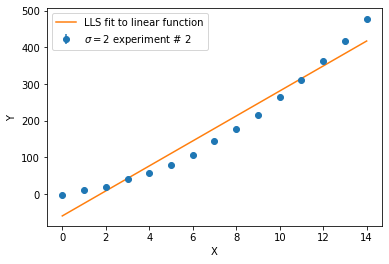

In [13]:
qnew_x, qnew_y = zip(*sorted(zip(qxs[1], qdatas[1])))
plt.errorbar(qnew_x,qnew_y,yerr=2.,label=r'$\sigma = 2.$ experiment # 2',marker='o',linestyle='none')
lqfy =[]
for i in range(15):
  lqfy.append(func(qnew_x[i],lqms[1],lqbs[1]))
plt.plot(qnew_x,lqfy,label='LLS fit to linear function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [14]:


qqms = []
qqbs = []
qqcs = []

for i in range(Nexp):  
  popt, pcov = curve_fit(quadf, qxs[i], qdatas[i],sigma=sig)
  qqms.append(popt[0])
  qqbs.append(popt[1])
  qqcs.append(popt[2])

qqfit_ys = []
for i in range(Nexp):
  ys = np.dot(qqms[i].T,qxs[i]**2) + np.dot(qqbs[i].T,qxs[i]) + qqcs[i]
  qqfit_ys.append(ys)

qqchi2s = []
for i in range(Nexp):
  qqchi2s.append(chi2(np.array(qdatas[i]),np.array(qqfit_ys[i]),2))



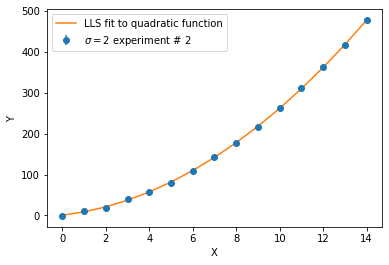

In [15]:

plt.errorbar(qnew_x,qnew_y,yerr=2.,label=r'$\sigma = 2.$ experiment # 2',marker='o',linestyle='none')
qqfy =[]
for i in range(15):
  qqfy.append(quadf(qnew_x[i],qqms[1],qqbs[1],qqcs[1]))
plt.plot(qnew_x,qqfy,label='LLS fit to quadratic function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

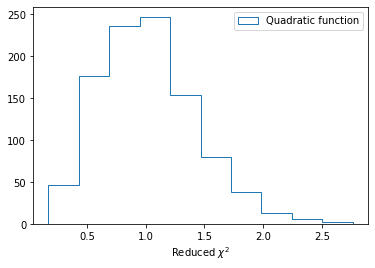

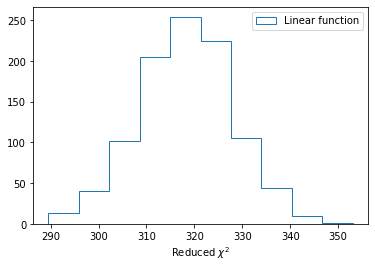

In [16]:
plt.hist(np.array(qqchi2s)/(15.-3.),histtype='step',label='Quadratic function')
#plt.hist(np.array(lqchi2s)/(15.-2.),histtype='step',label='Linear function')
plt.xlabel(r'Reduced $\chi^2$ ')
plt.legend()
plt.show()
#plt.hist(np.array(qqchi2s)/(15.-3.),histtype='step',label='Quadratic function')
plt.hist(np.array(lqchi2s)/(15.-2.),histtype='step',label='Linear function')
plt.xlabel(r'Reduced $\chi^2$ ')
plt.legend()
plt.show()

This shows that the fit to a linear function is a poor model whereas fitting the data to a quadratic function gives a "good" fit. 

#3.  
a) Generate experiments where the data follows an exponential decay law.  One wants to determine the best value for the decay time.  Show one example of samples drawn from this PDF, with y-axis error bars on each bin

In [17]:
 import random 

 def expdecay(t,A,tau):
   return(A*np.exp(-t/tau))

tau = 1
A = 10

Nsample = 1000
Nloop = 10000

def sampling(Nsample):
  tau = 1
  A = 10
  P = []
  for i in range (0,Nloop):
    x = random.random()*5
    y = random.random()*A
    p = expdecay(x,A,tau)
    if y < p:
      P.append(x)
    if len(P) == Nsample:
      break
  return(P)

exp_data = sampling(Nsample)
xval = np.arange(0,5,0.1)
yval = expdecay(xval,A,tau)


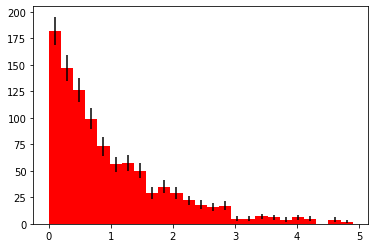

In [18]:
y, binEdges = np.histogram(exp_data,bins = 25)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.2
var = expdecay(bincenters,A,tau)
#plt.plot(xval,yval)
#plt.hist(b[:-1],b,weights=h)
plt.bar(bincenters, y, width=width, color='r',yerr=menStd)
plt.show()


b) The ML estimate (see, e.g., Cowan chapter 7) is both unbiased and optimal (as is the straight mean of the decay times observed, assuming that one has equal efficiency for all possible decay times).  Here you should explore an estimator based upon least-squares using binned data.  Transform the problem into a linear one by taking the log of the pdf.  (Make sure you transform the "sqrt(N)" errors appropriately.)  Plot the histogram with error bars after the transformation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


<ErrorbarContainer object of 3 artists>

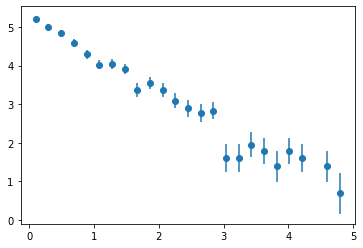

In [19]:
logy = np.log(y)
logerr = np.log(y + np.sqrt(y)) - np.log(y)
plt.errorbar(bincenters,logy,yerr=logerr,marker='o',linestyle='none')

c) Estimate the lifetime (tau) using a LLS fit.  Investigateany biases in your estimator for tau, particularly when you have small number of events in a bin (i.e. change the number of bins or number of samples you’ve generated per experiment and do your fit again)

In [21]:
poptexp, pcovexp = curve_fit(expdecay, bincenters, logy,sigma=logerr)
fit_logs = poptexp[0]*np.exp(-bincenters/poptexp[1])
print(tau)
print("estimate of tau (bins=25) =",poptexp[1])

y, binEdges = np.histogram(exp_data,bins = 10)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
logy = np.log(y)
logerr = np.log(y + np.sqrt(y)) - np.log(y)
poptexp, pcovexp = curve_fit(func, bincenters, logy,sigma=logerr)
fit_logs = poptexp[0]*np.exp(-bincenters/poptexp[1])
print(tau)
print("estimate of tau (bins=10) =",poptexp[1])

ValueError: ignored

Due Thursday April 29.
# 1.
 Read Cousins, “Why isn’t every physicist a Bayesian?” Answer the following questions from the paperwith just a sentence or some bullet points each.  This is just a check you read it.  We’ll discuss these questions in class on Thursday April 29.
 
 
 a) Section IV: What are some of the issues in incorporating a physical boundary into a confidence interval? (Note: this paper was written 4 years before Feldman-Cousins).


 
 b) Section V: What are the criteria for construction of a classical confidence interval?
 
 c) Section V: What are the criteria for the construction of a Bayesian confidence (credible) interval?
 
 d) Section V: What prior would Jeffreys suggest we use in the absence of any knowledge about the true value of our parameter, mu?  What is the reasoning behind this set of priors?
 
 e) What are some of the drawbacks of the classical vs. Bayesian methods forinterval construction?
 
 
f) Section VI: How might you deal with a systematic Gaussian error on top of your Poisson process?